**PART 1**

In [85]:
import pandas as pd
url='https://raw.githubusercontent.com/jennybc/gapminder/master/data-raw/08_gap-every-five-years.tsv'
data = pd.read_csv(url, sep = '\t')
data.head()

,country,continent,year,lifeExp,pop,gdpPercap
0,Afghanistan,Asia,1952,28.801,8425333,779.445314
1,Afghanistan,Asia,1957,30.332,9240934,820.853030
2,Afghanistan,Asia,1962,31.997,10267083,853.100710
3,Afghanistan,Asia,1967,34.020,11537966,836.197138
4,Afghanistan,Asia,1972,36.088,13079460,739.981106


EXERCISE 1

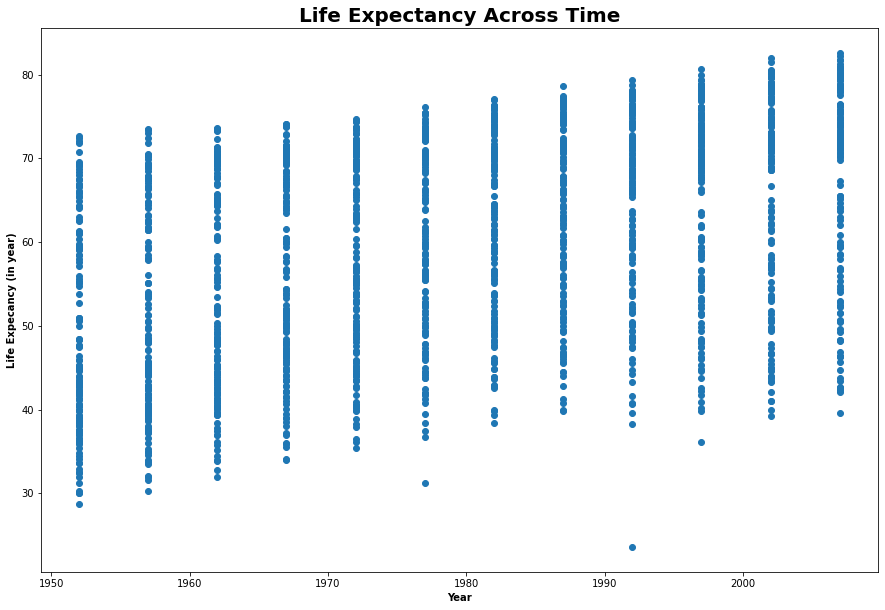

In [86]:
import matplotlib.pyplot as plt

plt.figure(figsize=(15,10))
plt.title("Life Expectancy Across Time", size=20, weight='bold')
plt.xlabel("Year", size=10, weight='bold')
plt.ylabel("Life Expecancy (in year)", size=10, weight='bold')
plt.plot(data['year'], data['lifeExp'],'o')

QUESTION 1

Text(0, 0.5, 'Life Expecancy (in year)')

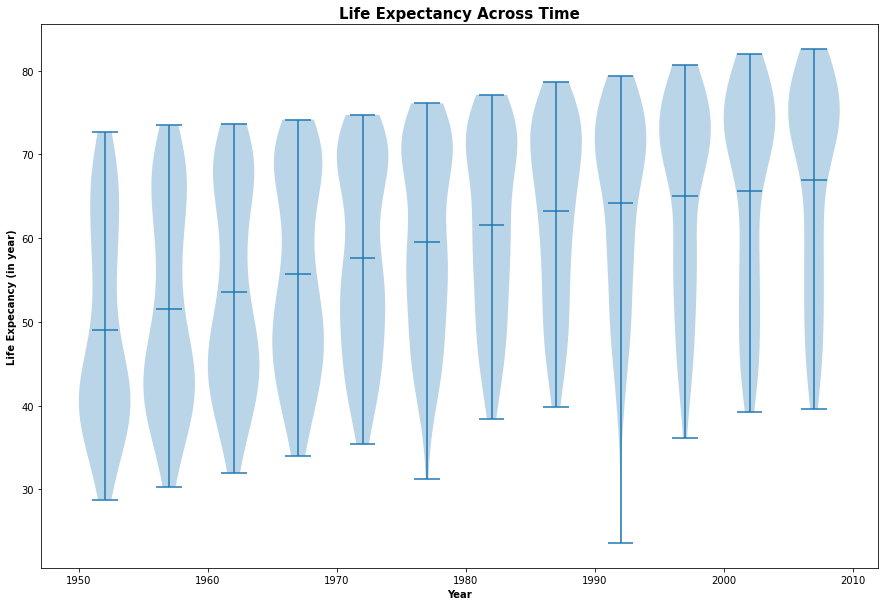

In [87]:
wrangle_data = pd.pivot_table(data, index = 'country', columns = 'year', values = 'lifeExp' )
year = wrangle_data.columns.tolist()
life_exp_per_year = wrangle_data.transpose().values.tolist()

fig, ax = plt.subplots()
plt.gcf().set_size_inches((15, 10))
ax.violinplot(life_exp_per_year,year,widths=4,showmeans=True)
plt.title("Life Expectancy Across Time", size=15, weight='bold')
plt.xlabel("Year", size=10, weight='bold')
plt.ylabel("Life Expecancy (in year)", size=10, weight='bold')

This is an increasing general trend for life expectancy across time, and this trend is linear.

QUESTION 2

The distribution of life expectancy across countries for individual years is skewed, because we can see tails in some years. Moreover, it is not unimodal and not symmetric around its center because it is not a normal distribution. 

QUESTION 3

I will reject the null hypothesis of no relationship, because I can intuitively saw there is a strong relationship between year and life expectancy

QUESTION 4

It should look like linear.

QUESTION 5

The plot should look like a normal distribution, so it is symmetric and concentrates around 0.

EXERCISE 2

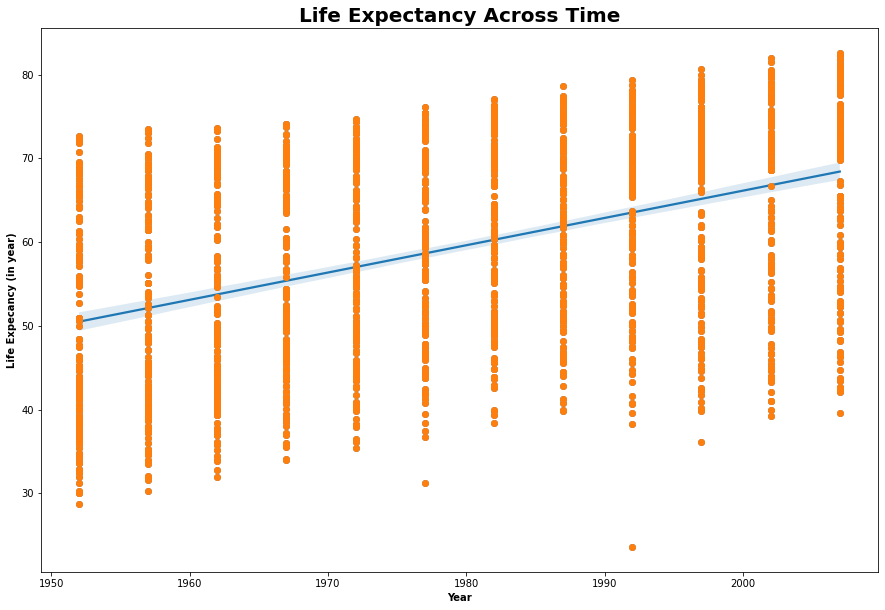

In [88]:
import seaborn as sns

plt.figure(figsize=(15,10))
sns.regplot(x = "year", y = "lifeExp", data = data)
plt.title("Life Expectancy Across Time", size=20, weight='bold')
plt.xlabel("Year", size=10, weight='bold')
plt.ylabel("Life Expecancy (in year)", size=10, weight='bold')
plt.plot(data['year'], data['lifeExp'],'o')

In [89]:
from statsmodels.formula.api import ols

result = ols(formula = "lifeExp ~ year", data = data).fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                lifeExp   R-squared:                       0.190
Model:                            OLS   Adj. R-squared:                  0.189
Method:                 Least Squares   F-statistic:                     398.6
Date:                Fri, 22 Apr 2022   Prob (F-statistic):           7.55e-80
Time:                        21:46:33   Log-Likelihood:                -6597.9
No. Observations:                1704   AIC:                         1.320e+04
Df Residuals:                    1702   BIC:                         1.321e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   -585.6522     32.314    -18.124      0.000    -649.031    -522.273
year           0.3259      0.016     19.965      0.000       0.294       0.358
==============================================================================
Omnibus:                      386.124   Durbin-Watson:                   0.197
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               90.750
Skew:                          -0.268   Prob(JB):                     1.97e-20
Kurtosis:                       2.004   Cond. No.                     2.27e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.27e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

The life expectancy increase by 0.32590383 years every year.

QUESTION 7

We reject the null hypothesis because p-value is small.

EXERCISE 3

Text(0, 0.5, 'Life Expecancy (in year)')

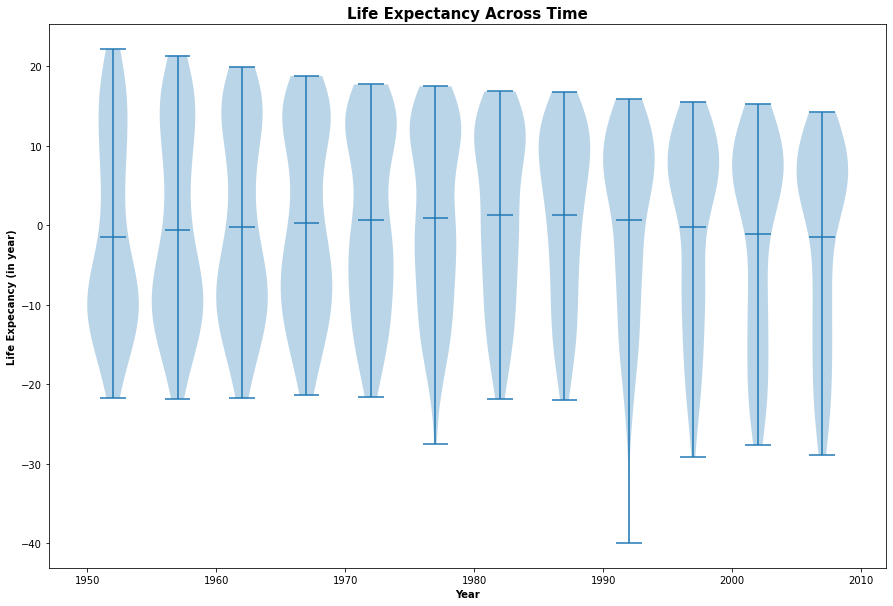

In [90]:
k = result.params.year
b = result.params.Intercept
new_data = data.copy()
new_data['residual'] =  new_data['lifeExp'] - (new_data['year']*k+b)

wrangle_data = pd.pivot_table(new_data, index = 'country', columns = 'year', values = 'residual' )
year = wrangle_data.columns.tolist()
life_exp_per_year = wrangle_data.transpose().values.tolist()

fig, ax = plt.subplots()
plt.gcf().set_size_inches((15, 10))
ax.violinplot(life_exp_per_year,year,widths=4,showmeans=True)
plt.title("Life Expectancy Across Time", size=15, weight='bold')
plt.xlabel("Year", size=10, weight='bold')
plt.ylabel("Life Expecancy (in year)", size=10, weight='bold')

QUESTION 8

Yes, the plot of Exercise 3 match your expectations.

EXERCISE 4

Text(0, 0.5, 'Life Expectancy Residuals')

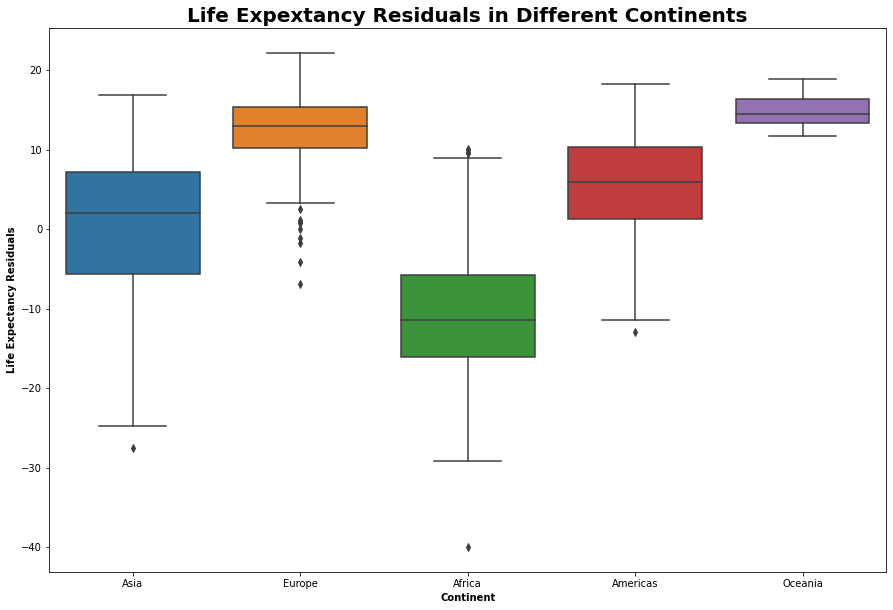

In [91]:
plt.figure(figsize=(15,10))
sns.boxplot(x = 'continent', y = 'residual', data = new_data)
plt.title("Life Expextancy Residuals in Different Continents", size=20, weight='bold')
plt.xlabel("Continent", size=10, weight='bold')
plt.ylabel("Life Expectancy Residuals", size=10, weight='bold')

QUESTION 9

Yes, there is a dependence between model residual and continent. Therefore, I would suggest that each continent should analysis based on the different box-plot shape.

EXERCISE 5

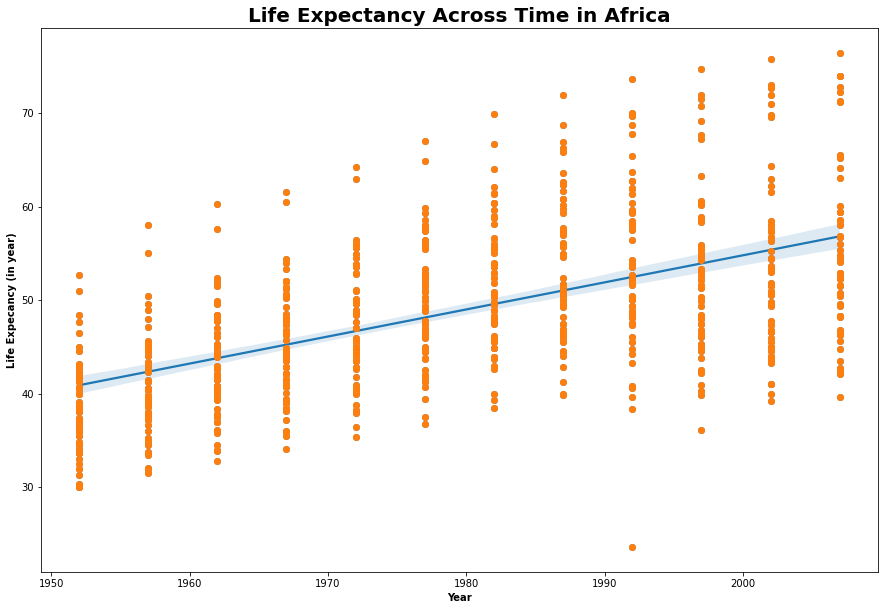

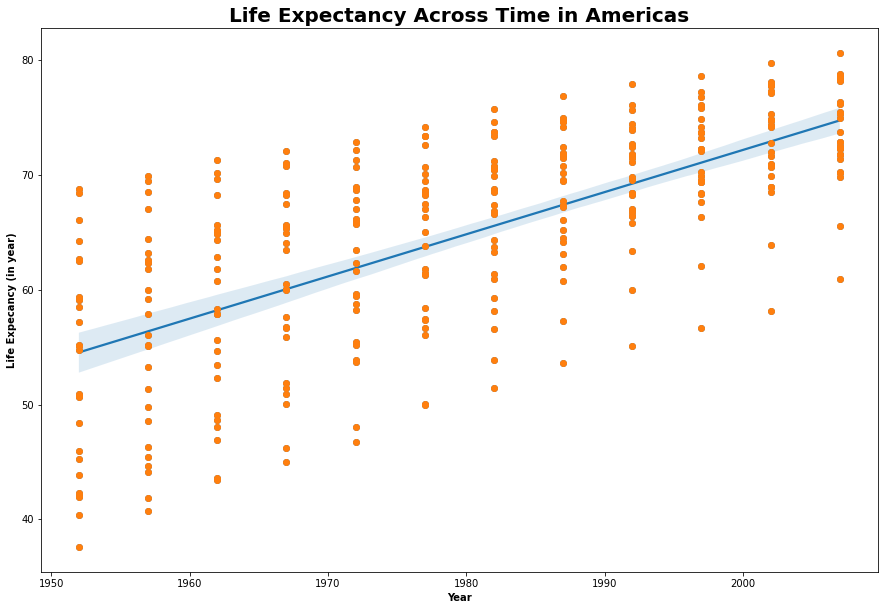

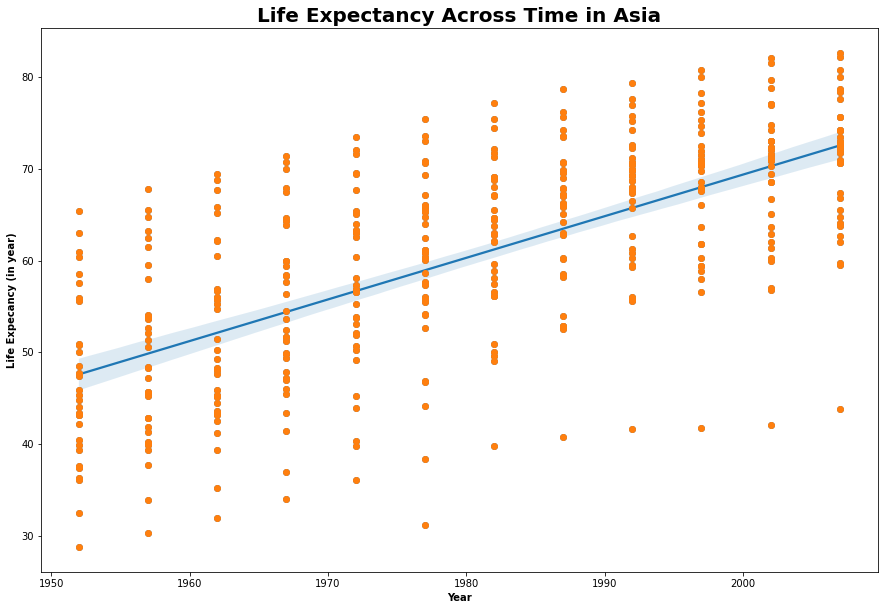

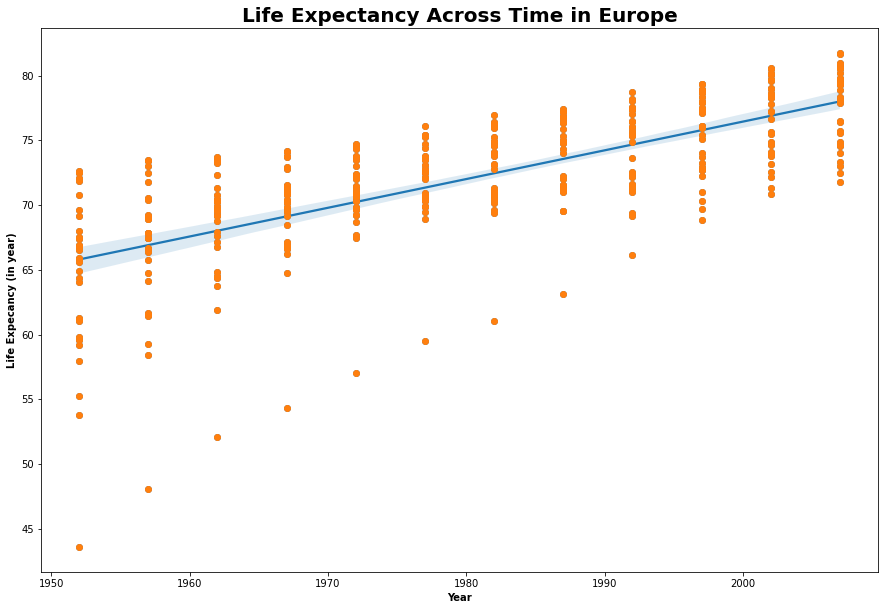

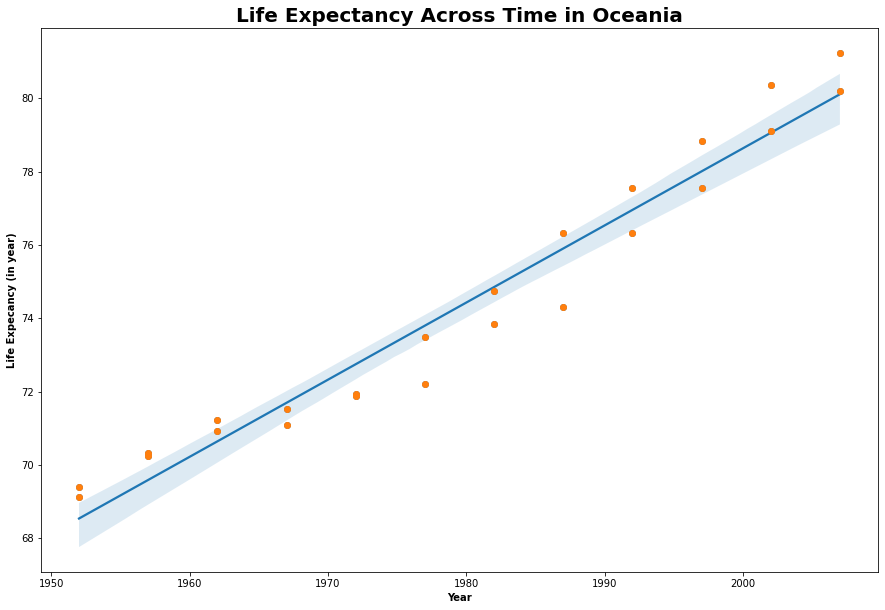

In [92]:
import numpy as np

for continent in np.unique(data['continent']):
  p = data.drop(data[continent != data['continent']].index)
  plt.figure(figsize=(15,10))
  sns.regplot(x = "year", y = "lifeExp", data = p)
  plt.title("Life Expectancy Across Time in " + continent, size=20, weight='bold')
  plt.xlabel("Year", size=10, weight='bold')
  plt.ylabel("Life Expecancy (in year)", size=10, weight='bold')
  plt.plot(p['year'], p['lifeExp'],'o')

QUESTION 10

Yes, the regression model should include an interaction term for continent and year, because the data is different in every continent, and it is a factor to affect the life expactancy.

EXERCISE 6

In [93]:
new_result = ols(formula = 'lifeExp ~ year * continent', data = new_data).fit()
new_result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                lifeExp   R-squared:                       0.693
Model:                            OLS   Adj. R-squared:                  0.691
Method:                 Least Squares   F-statistic:                     424.3
Date:                Fri, 22 Apr 2022   Prob (F-statistic):               0.00
Time:                        21:46:39   Log-Likelihood:                -5771.9
No. Observations:                1704   AIC:                         1.156e+04
Df Residuals:                    1694   BIC:                         1.162e+04
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
==============================================================================================
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
Intercept                   -524.2578     32.963    -15.904      0.000    -588.911    -459.605
continent[T.Americas]       -138.8484     57.851     -2.400      0.016    -252.315     -25.382
continent[T.Asia]           -312.6330     52.904     -5.909      0.000    -416.396    -208.870
continent[T.Europe]          156.8469     54.498      2.878      0.004      49.957     263.737
continent[T.Oceania]         182.3499    171.283      1.065      0.287    -153.599     518.298
year                           0.2895      0.017     17.387      0.000       0.257       0.322
year:continent[T.Americas]     0.0781      0.029      2.673      0.008       0.021       0.135
year:continent[T.Asia]         0.1636      0.027      6.121      0.000       0.111       0.216
year:continent[T.Europe]      -0.0676      0.028     -2.455      0.014      -0.122      -0.014
year:continent[T.Oceania]     -0.0793      0.087     -0.916      0.360      -0.249       0.090
==============================================================================
Omnibus:                       27.121   Durbin-Watson:                   0.242
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               44.106
Skew:                          -0.121   Prob(JB):                     2.65e-10
Kurtosis:                       3.750   Cond. No.                     2.09e+06
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.09e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

QUESTION 11

No, not all parameters in the model are significantly (in the p-value sense) different from zero, becuase Oceania's p-value is 0.287 at 0.05 significance level. 

QUESTION 12

In [94]:
new_result.params

Intercept                    -524.257846
continent[T.Americas]        -138.848447
continent[T.Asia]            -312.633049
continent[T.Europe]           156.846852
continent[T.Oceania]          182.349883
year                            0.289529
year:continent[T.Americas]      0.078122
year:continent[T.Asia]          0.163593
year:continent[T.Europe]       -0.067597
year:continent[T.Oceania]      -0.079257
dtype: float64

The increasing rate of Africa is in 0.289529, Americas is in 0.078122, Asia is 0.163593, Europe is in -0.067597, and Oceania is in -0.079257.

EXERCISE 7

Text(0, 0.5, 'Life Expecancy (in year)')

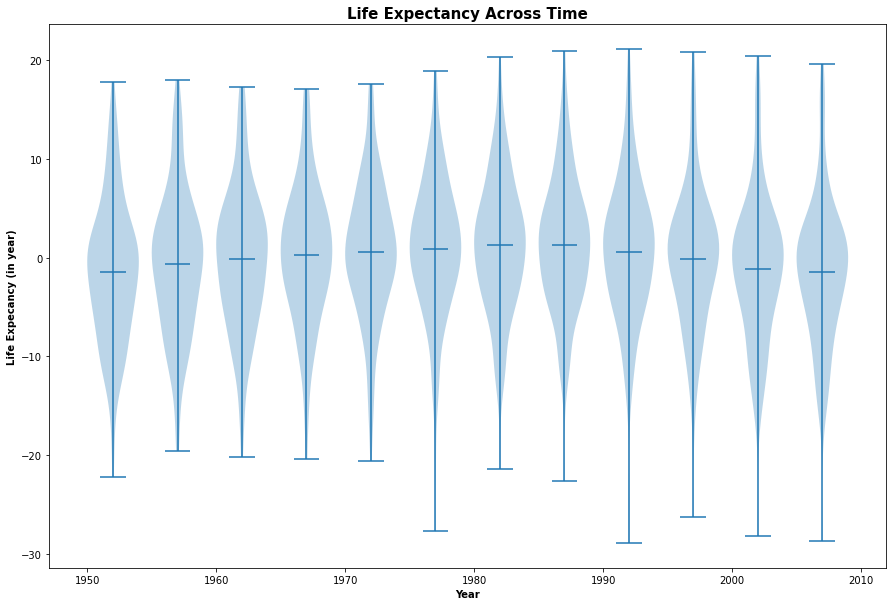

In [95]:
new_data = data.copy()
new_data['residual'] =  new_result.resid.tolist()

wrangle_data = pd.pivot_table(new_data, index = 'country', columns = 'year', values = 'residual' )
year = wrangle_data.columns.tolist()
life_exp_per_year = wrangle_data.transpose().values.tolist()

fig, ax = plt.subplots()
plt.gcf().set_size_inches((15, 10))
ax.violinplot(life_exp_per_year,year,widths=4,showmeans=True)
plt.title("Life Expectancy Across Time", size=15, weight='bold')
plt.xlabel("Year", size=10, weight='bold')
plt.ylabel("Life Expecancy (in year)", size=10, weight='bold')

It matches assumptions of the linear regression model, because it is symmetric and concentrates around 0.

**PART 2**

In [114]:
from sklearn.datasets import load_wine
import sklearn.model_selection as model_selection
from sklearn.tree import DecisionTreeClassifier
import sklearn.metrics as metrics
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score

wine = load_wine()
dataFrame = pd.DataFrame(wine.data, columns=wine.feature_names)
dep = pd.Categorical.from_codes(wine.target, wine.target_names)
ind_train, ind_test, dep_train, dep_test = model_selection.train_test_split(dataFrame, dep, random_state=42)

In [115]:
# decision trees

dt = DecisionTreeClassifier()
dt.fit(ind_train, dep_train)
predicted = dt.predict(ind_test)
actual = np.array(dep_test)
predictions = np.array(predicted)

print(confusion_matrix(actual, predictions))
print("The scores for each class: " + str(precision_score(actual, predictions, average=None)))
print("The number of correctly classified samples: " + str(accuracy_score(actual, predictions, normalize=False)))
print("The fraction of correctly classified samples: " + str(accuracy_score(actual, predictions) * 100) + "%")

[[13  2  0]
 [ 0 18  0]
 [ 0  1 11]]
The scores for each class: [1.         0.85714286 1.        ]
The number of correctly classified samples: 42
The fraction of correctly classified samples: 93.33333333333333%


In [117]:
# k-NN classification

knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(ind_train, dep_train)
predicted = knn.predict(ind_test)
actual = np.array(dep_test)
predictions = np.array(predicted)

print(confusion_matrix(actual, predictions))
print("The scores for each class: " + str(precision_score(actual, predictions, average=None)))
print("The number of correctly classified samples: " + str(accuracy_score(actual, predictions, normalize=False)))
print("The fraction of correctly classified samples: " + str(accuracy_score(actual, predictions) * 100) + "%")

[[13  0  2]
 [ 3 13  2]
 [ 1  2  9]]
The scores for each class: [0.76470588 0.86666667 0.69230769]
The number of correctly classified samples: 35
The fraction of correctly classified samples: 77.77777777777779%


I choose load_wine to be the database, and there are three classes. I pick decision trees and k-nn classification. The accuracy of decision tree is 93.33%, and the accuracy of k-nn classification is 77.78%. The accuracy of decision tree is higher than the accuracy of k-nn classification, so we should choose decision tree.